# Import required libraries

In [1]:
## Statistical and visualization libraries
import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math

## Mapping libraries
import folium
from folium.plugins import HeatMap

## Machine learning libraries
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder as le
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score,mean_absolute_error, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Display graphs in the notebook
%matplotlib inline

# Load and describe the data

In [2]:
fires_dataframe = pd.read_csv('data/fires2.csv', parse_dates=[6])
parcels_dataframe = pd.read_excel('data/parcels2.xlsx', parse_dates=True)
foreclosures_dataframe = pd.read_excel('data/foreclosures.xlsx', parse_dates=True)
rent_reg_dataframe = pd.read_excel('data/rental_registration_permits.xlsx', parse_dates=True)
utility_disconnects_dataframe = pd.read_excel('data/utility_disconnects.xlsx', parse_dates=True)
code_cases_dataframe = pd.read_excel('data/code_cases.xlsx', parse_dates = True)
minnehaha_tax_dataframe = pd.read_excel('data/minnehaha_tax.xlsx', parse_dates = True)
lincoln_tax_dataframe = pd.read_excel('data/lincoln_tax.xlsx', parse_dates = True)
building_fires_dataframe = fires_dataframe[fires_dataframe['id2']== 111].copy()

In [3]:
# Create copys of DataFrames so if I mess something up I don't have to load up everything again
fires = fires_dataframe.copy()
parcels = parcels_dataframe.copy()
foreclosures = foreclosures_dataframe.copy()
rent_reg = rent_reg_dataframe.copy()
utility_disconnects = utility_disconnects_dataframe.copy()
code_cases = code_cases_dataframe.copy()
minnehaha_tax = minnehaha_tax_dataframe.copy()
lincoln_tax = lincoln_tax_dataframe.copy()
building_fires = building_fires_dataframe.copy()

In [4]:
parcels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59865 entries, 0 to 59864
Data columns (total 47 columns):
TAG           59854 non-null float64
COUNTYID      59762 non-null object
ADDRESS       59855 non-null object
OWNNAME1      59118 non-null object
OWNNAME2      9091 non-null object
OWNADDRESS    59114 non-null object
OWNCITY       59120 non-null object
OWNSTATE      59100 non-null object
OWNZIP        59560 non-null float64
OWNZIP2       48204 non-null float64
SQFT          59865 non-null float64
ACREAGE       59865 non-null float64
FRONTFOOT     59865 non-null float64
LEGAL         59743 non-null object
ADDITION      59846 non-null object
ADDITIONNU    59845 non-null float64
PARHOUSE      59852 non-null float64
PARHALF       16 non-null object
PARPR         59145 non-null object
PARSTREET     59148 non-null object
PARTYPE       59092 non-null object
PARPD         678 non-null object
UNITNUM       1727 non-null object
ACTIVITY      59865 non-null int64
LANDUSE       59865 non-nul

In [5]:
parcels.describe()

,TAG,OWNZIP,OWNZIP2,SQFT,ACREAGE,FRONTFOOT,ADDITIONNU,PARHOUSE,ACTIVITY,LANDUSE,NUMUNITS,ZIPCODE,Shape_Leng,Shape_Area
count,5.985400e+04,59560.000000,48204.000000,5.986500e+04,59865.000000,59865.000000,59845.000000,59852.000000,59865.000000,59865.000000,59865.000000,59865.000000,59865.000000,5.986500e+04
mean,1.420336e+13,56785.236014,1569.961165,3.022719e+04,0.694451,83.404921,93781.018464,3130.283265,20.334219,196.298622,1.323845,57105.756753,537.125953,3.019778e+04
std,4.175051e+12,6070.003906,2263.229039,2.877843e+05,6.606637,108.768123,2578.014239,2333.058543,22.619705,232.103763,6.419357,2.356349,730.864190,2.860198e+05
min,1.121850e+13,0.000000,0.000000,0.000000e+00,0.000000,0.000000,90005.000000,0.000000,1.000000,110.000000,0.000000,57103.000000,39.138863,4.624088e-01
25%,1.220423e+13,57104.000000,0.000000,6.653000e+03,0.150000,50.000000,91640.000000,1108.000000,11.000000,110.000000,1.000000,57104.000000,360.565229,6.702583e+03
50%,1.222228e+13,57106.000000,0.000000,8.880000e+03,0.200000,70.000000,93530.000000,2616.000000,11.000000,110.000000,1.000000,57106.000000,398.064593,8.921874e+03
75%,1.223523e+13,57108.000000,3106.000000,1.244500e+04,0.290000,90.000000,95185.000000,4825.000000,12.000000,130.000000,1.000000,57108.000000,467.960008,1.249985e+04
max,2.291820e+13,99690.000000,9625.000000,5.205275e+07,1194.970000,6127.000000,98288.000000,47184.000000,97.000000,999.000000,364.000000,57197.000000,42956.145459,5.205322e+07


In [6]:
fires.type.value_counts()

Building fire                                               1258
Passenger vehicle fire                                       639
Cooking fire, confined to container                          244
Grass fire                                                   198
Dumpster or other outside trash receptacle fire              183
Outside rubbish, trash or waste fire                         124
Brush, or brush and grass mixture fire                        94
Special outside fire, other                                   91
Outside equipment fire                                        80
Fire, other                                                   71
Mobile property (vehicle) fire, other                         71
Natural vegetation fire, other                                70
Trash or rubbish fire, contained                              64
Outside rubbish fire, other                                   57
Fire in mobile home used as fixed residence                   56
Road freight or transport

In [7]:
building_fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 652 to 2318
Data columns (total 10 columns):
FID           1258 non-null int64
Join_Count    1258 non-null int64
TARGET_FID    1258 non-null int64
id            1258 non-null int64
id2           1258 non-null int64
type          1258 non-null object
date          1258 non-null datetime64[ns]
lat           1258 non-null float64
lon           1258 non-null float64
ADDRESS       1258 non-null object
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 108.1+ KB


In [8]:
fire_map = folium.Map(location=[43.54, -96.72], zoom_start=14, tiles='Stamen Terrain')
heat_df = building_fires[['lat', 'lon']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lon'])
heat_data = [[row['lat'],row['lon']] for index, row in heat_df.iterrows()]
HeatMap(heat_data).add_to(fire_map)
fire_map

# Data wrangling

In [9]:
# Parcels dataset
df = pd.concat([parcels, pd.get_dummies(parcels.PARPR), pd.get_dummies(parcels.PARCELTYPE), pd.get_dummies(parcels.PARTYPE), pd.get_dummies(parcels.COUNTY), pd.get_dummies(parcels.ACTIVITY, prefix = 'ACT_'), pd.get_dummies(parcels.LANDUSE, prefix='LANDUSE_')], axis = 1)
parcels.drop(columns = ['BlockDesig', 'FORM_PRIMA', 'PARCELTYPE', 'FORM_COMME', 'PARCEL_TRA', 'PARCEL_LOT', 'created_us', 'TAG', 'ADDITION', 'ADDITIONPR', 'COUNTYID', 'OWNNAME1', 'OWNZIP', 'OWNZIP2', 'OWNNAME2', 'OWNCITY', 'OWNSTATE', 'OWNADDRESS', 'LEGAL', 'ADDITIONNU', 'PARHALF', 'PARPD', 'UNITNUM', 'GlobalID', 'last_edite', 'Shape_Leng', 'Shape_Area', 'DEPARTMENT', 'FORM_ACCES', 'FORM_SIGNE', 'FORM_DATE', 'created_da', 'last_edi_1', 'PARPR', 'PARTYPE', 'COUNTY', 'PARSTREET', 'ACTIVITY', 'LegalStart'], inplace = True)
df.drop(columns = ['BlockDesig', 'FORM_PRIMA', 'PARCELTYPE', 'FORM_COMME', 'PARCEL_TRA', 'PARCEL_LOT', 'created_us', 'TAG', 'ADDITION', 'ADDITIONPR', 'COUNTYID', 'OWNNAME1', 'OWNZIP', 'OWNZIP2', 'OWNNAME2', 'OWNCITY', 'OWNSTATE', 'OWNADDRESS', 'LEGAL', 'ADDITIONNU', 'PARHALF', 'PARPD', 'UNITNUM', 'GlobalID', 'last_edite', 'Shape_Leng', 'Shape_Area', 'DEPARTMENT', 'FORM_ACCES', 'FORM_SIGNE', 'FORM_DATE', 'created_da', 'last_edi_1', 'PARPR', 'PARTYPE', 'COUNTY', 'PARSTREET', 'ACTIVITY', 'LegalStart'], inplace = True)
df.PARHOUSE.fillna(method='bfill', inplace = True)

#... FINISH CLEANING UP THE PARCELS DATASET...

# Fire dataset
building_fires = building_fires.groupby('ADDRESS').max()
building_fires.drop(columns = ['FID', 'Join_Count', 'TARGET_FID', 'id', 'type', 'lat', 'lon', 'id2'], inplace = True)
building_fires['INCIDENT'] = 1
building_fires.info()
df = pd.merge(df, building_fires, how = 'left', on='ADDRESS')
df.INCIDENT.fillna(0, inplace = True)
df.date.fillna(pd.to_datetime('1/1/2008'), inplace = True)

# Foreclosure dataset
foreclosure_df = pd.DataFrame(foreclosures.groupby('ADDRESS').count())
foreclosure_df.rename(columns = { 'NAME' : 'FORECLOSED'}, inplace = True)
foreclosure_df.drop(columns = ['AUCTIONDATE', 'ASSESSEDVALUE', 'YEAR'], inplace = True)
df = pd.merge(df, foreclosure_df, how = 'left', on = 'ADDRESS')
df.FORECLOSED.fillna(0, inplace = True)

# Rent registry dataset
rent_reg.drop(columns = ['City_1', 'State_1', 'Permit_Num', 'Contact_Ty', 'Last_Name', 'First_Name', 'Middle_Ini', 'Business_N', 'Contact_Pr', 'Business_P', 'Mobile_Pho', 'Home_Phone', 'Email', 'Contact_Ad', 'Issue_Date'], inplace = True)
rent_reg.Units.fillna(value=rent_reg.Units.median(), inplace = True)
rent_reg_grouped = rent_reg.groupby('Address').mean()
rent_df = pd.DataFrame(rent_reg_grouped)
rent_df.rename(columns = { 'Address' : 'ADDRESS', 'Units' : 'RENT_REG_UNITS', 'YEAR' : 'RENT_REG_YEAR'}, inplace = True)
rent_df.rename_axis('ADDRESS', inplace = True)
rent_df['RENT_REG'] = 1
df = pd.merge(df, rent_df, how = 'left', on = 'ADDRESS')
df.RENT_REG.fillna(0, inplace = True)
df.RENT_REG_UNITS.fillna(0, inplace = True)
df.RENT_REG_YEAR.fillna(0, inplace = True)

# Utility disconnects dataset
utility_disconnects.rename(columns = {'Address' : 'ADDRESS', 'Year' : 'UTILITY_DISCONNECTS'}, inplace = True)
uti_disc_grouped = utility_disconnects.groupby('ADDRESS').count()
uti_disc_df = pd.DataFrame(uti_disc_grouped)
uti_disc_df.info()
uti_disc_df['ANY_DISCONNECT'] = 1
df = pd.merge(df, uti_disc_df, how = 'left', on = 'ADDRESS')
df.UTILITY_DISCONNECTS.fillna(0, inplace = True)
df.ANY_DISCONNECT.fillna(0, inplace = True)

# Code cases
case_types = pd.get_dummies(code_cases.CaseType)
code_cases = pd.concat([code_cases, case_types], axis=1)
code_cases.drop(columns = ['Year'], inplace = True)
code_cases_grouped = code_cases.groupby(['ADDRESS']).sum()
code_cases_df = pd.DataFrame(code_cases_grouped)
code_cases_df['TOTAL_VIOLATIONS'] = code_cases_df.sum(axis=1)
code_cases_df['ANY_VIOLATIONS'] = 1
df = pd.merge(df, code_cases_df, how = 'left', on = 'ADDRESS')
df.ANY_VIOLATIONS.fillna(0, inplace = True)
df['Building Service'].fillna(0, inplace = True)
df['Drainage'].fillna(0, inplace = True)
df['Erosion and Sediment Control'].fillna(0, inplace = True)
df['Fire'].fillna(0, inplace = True)
df['Health Nuisance Complaints'].fillna(0, inplace = True)
df['IMPORT / Tree Survey & Stump Removal'].fillna(0, inplace = True)
df['Illicit Discharge'].fillna(0, inplace = True)
df['Landfill'].fillna(0, inplace = True)
df['Manufactured Housing'].fillna(0, inplace = True)
df['Parks and Rec - Dead or Diseased Tree'].fillna(0, inplace = True)
df['Parks and Rec - Tree Complaint'].fillna(0, inplace = True)
df['Property Maintenance'].fillna(0, inplace = True)
df['Rental Registration'].fillna(0, inplace = True)
df['Right of Way '].fillna(0, inplace = True)
df['Sidewalks and Ramps'].fillna(0, inplace = True)
df['Snow'].fillna(0, inplace = True)
df['Special Assessment'].fillna(0, inplace = True)
df['Vegetation'].fillna(0, inplace = True)
df['Waste Water'].fillna(0, inplace = True)
df['Water Purfication'].fillna(0, inplace = True)
df['Zoning'].fillna(0, inplace = True)
df.TOTAL_VIOLATIONS.fillna(0, inplace = True)

# Crime


# Tax assessment
minnehaha_tax.drop(columns=['TAG', 'COUNTYID', 'ACREAGE', 'SQFT', 'FRONTFOOT', 'PARHOUSE',
       'PARHALF', 'PARPR', 'PARSTREET', 'PARTYPE', 'PARPD', 'LOT',
       'BLOCK', 'TRACT', 'SUBDIVNO', 'ADDITION', 'LEGAL', 'COUNTY', 'MRTNSP',
       'MRSCHD', 'SCHOOLDESC', 'MRZON1', 'NUMUNITS', 'MRLYAP', 'MAP_ID'], inplace = True)
lincoln_tax['ADDRESS'] = lincoln_tax.Address
lincoln_tax.drop(columns = ['FID', 'OBJECTID', 'PID', 'Plat', 'SchoolDist', 'Township', 'STR',
       'Address', 'Name', 'Add1', 'Add2', 'Add3', 'Zip', 'Legal1', 'Legal2',
       'Legal3', 'Legal4', 'Class1_1', 'Class2_1','Class3_1', 'Class4_1', 'Class5_1'], inplace = True)
combined_tax = pd.merge(lincoln_tax, minnehaha_tax, how = 'outer', on = 'ADDRESS')
combined_tax.fillna(0, inplace = True)

combined_tax['LANDVALUE'] = combined_tax.MRLNVC + combined_tax.Value1_1
combined_tax['BUILDVALUE'] = combined_tax.MRBDVC + combined_tax.Value12_1
combined_tax['TOTALVALUE'] = combined_tax[['MRTOTC' , 'Value1_1', 'Value12_1', 'Value13_1', 'Value14_1', 'Value15_1']].sum(axis=1) 

combined_tax.drop(columns=['Value1_1', 'Value12_1', 'Value13_1','Value14_1', 'Value15_1', 'MRLNVC', 'MRBDVC', 'MRTOTC'], inplace = True)

df = pd.merge(df, combined_tax, how = 'left', on = 'ADDRESS')
df = df[df.ADDRESS != '0']
df = df.dropna(subset=['ADDRESS'])
df.LANDVALUE.fillna(0, inplace = True)
df.BUILDVALUE.fillna(0, inplace = True)
df.TOTALVALUE.fillna(0, inplace = True)
df.set_index('ADDRESS', inplace = True)

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries,   to 961 S BLAINE AVE
Data columns (total 2 columns):
date        1043 non-null datetime64[ns]
INCIDENT    1043 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 9887 entries, 1 S ELKJER CIR to 955 S RANDOLPH LN
Data columns (total 1 columns):
UTILITY_DISCONNECTS    9887 non-null int64
dtypes: int64(1)
memory usage: 154.5+ KB


In [10]:
df1 = df.pop('INCIDENT')
df['INCIDENT'] = df1
df.head(10)

,SQFT,ACREAGE,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,E,N,S,...,Vegetation,Waste Water,Water Purfication,Zoning,TOTAL_VIOLATIONS,ANY_VIOLATIONS,LANDVALUE,BUILDVALUE,TOTALVALUE,INCIDENT
ADDRESS,,,,,,,,,,,,,,,,,,,,,
3910 E WILCOX ST,154001.0,3.54,385.0,3910.0,540,0,57104,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,269502.0,1183885.0,1453387.0,0.0
4000 E WILCOX ST,94366.0,2.17,236.0,4000.0,970,0,57104,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,165141.0,0.0,165141.0,0.0
3901 E 60TH ST N,717199.0,16.46,255.0,3901.0,970,0,57104,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,29820.0,0.0,29820.0,0.0
4101 N SYCAMORE AVE,2735568.0,62.80,1665.0,4101.0,970,0,57104,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,82800.0,0.0,82800.0,0.0
6100 E RICE ST,93654.0,2.15,0.0,6100.0,460,0,57110,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,733.0,733.0,0.0
6630 E RICE ST,218000.0,5.00,0.0,6630.0,460,0,57110,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,0.0,50000.0,0.0
6600 E RICE ST,400000.0,9.18,0.0,6600.0,460,0,57110,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,91800.0,0.0,91800.0,0.0
3900 E BENSON RD,826768.0,18.98,650.0,3900.0,970,0,57104,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,328170.0,0.0,328170.0,0.0
4800 N VELOCITY AVE,106049.0,2.43,275.0,4800.0,250,0,57104,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,185586.0,885096.0,1070682.0,0.0


In [11]:
df.INCIDENT.value_counts()

0.0    58123
1.0     1165
Name: INCIDENT, dtype: int64

In [12]:
# Hiding the 2018 data

# First create a new column for parcels with incidents in 2018
df[df['date'] > '2018']
df['INCIDENT_2018'] = [1 if date > pd.to_datetime('2018') else 0 for date in df['date']] 

# Putting it in a different df just in case
fires_2018 = df[df['date'] > '2018']
fires_2018

,SQFT,ACREAGE,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,E,N,S,...,Waste Water,Water Purfication,Zoning,TOTAL_VIOLATIONS,ANY_VIOLATIONS,LANDVALUE,BUILDVALUE,TOTALVALUE,INCIDENT,INCIDENT_2018
ADDRESS,,,,,,,,,,,,,,,,,,,,,
601 E 50TH ST N,579488.0,13.30,557.0,601.0,220,0,57104,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1014104.0,5263671.0,6277775.0,1.0,1
4304 W PENNSYLVANIA CIR,10734.0,0.25,106.0,4304.0,110,1,57107,0,0,0,...,0.0,0.0,0.0,0.0,0.0,34004.0,119514.0,153518.0,1.0,1
100 E BENSON RD,569148.0,13.07,837.0,100.0,320,0,57104,1,0,0,...,0.0,0.0,0.0,0.0,0.0,996009.0,3925425.0,4921434.0,1.0,1
218 N SPRING AVE,6600.0,0.15,44.0,218.0,110,1,57104,0,1,0,...,0.0,0.0,0.0,3.0,1.0,13728.0,59095.0,72823.0,1.0,1
334 N SPRING AVE,4400.0,0.10,44.0,334.0,140,4,57104,0,1,0,...,0.0,0.0,0.0,6.0,1.0,11011.0,77642.0,88653.0,1.0,1
5005 E CHARLESTON DR,7920.0,0.18,66.0,5005.0,110,1,57110,1,0,0,...,0.0,0.0,0.0,0.0,0.0,28809.0,153713.0,182522.0,1.0,1
2600 E 8TH ST,35700.0,0.82,165.0,2600.0,140,72,57103,1,0,0,...,0.0,0.0,0.0,0.0,0.0,324000.0,2306415.0,2630415.0,1.0,1
719 N WAYLAND AVE,6248.0,0.14,44.0,719.0,110,1,57103,0,1,0,...,0.0,0.0,0.0,2.0,1.0,11244.0,111568.0,122812.0,1.0,1
901 N CLEVELAND AVE,60000.0,1.38,186.0,901.0,140,24,57103,0,1,0,...,0.0,0.0,0.0,4.0,1.0,120000.0,705198.0,825198.0,1.0,1


In [13]:
df.loc[(df.date > '2018') & (df.INCIDENT == 1), 'INCIDENT'] = 0

df.head()

,SQFT,ACREAGE,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,E,N,S,...,Waste Water,Water Purfication,Zoning,TOTAL_VIOLATIONS,ANY_VIOLATIONS,LANDVALUE,BUILDVALUE,TOTALVALUE,INCIDENT,INCIDENT_2018
ADDRESS,,,,,,,,,,,,,,,,,,,,,
3910 E WILCOX ST,154001.0,3.54,385.0,3910.0,540,0,57104,1,0,0,...,0.0,0.0,0.0,0.0,0.0,269502.0,1183885.0,1453387.0,0.0,0
4000 E WILCOX ST,94366.0,2.17,236.0,4000.0,970,0,57104,1,0,0,...,0.0,0.0,0.0,0.0,0.0,165141.0,0.0,165141.0,0.0,0
3901 E 60TH ST N,717199.0,16.46,255.0,3901.0,970,0,57104,1,0,0,...,0.0,0.0,0.0,0.0,0.0,29820.0,0.0,29820.0,0.0,0
4101 N SYCAMORE AVE,2735568.0,62.80,1665.0,4101.0,970,0,57104,0,1,0,...,0.0,0.0,0.0,0.0,0.0,82800.0,0.0,82800.0,0.0,0
6100 E RICE ST,93654.0,2.15,0.0,6100.0,460,0,57110,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,733.0,733.0,0.0,0


In [14]:
df.INCIDENT.value_counts()

0.0    58219
1.0     1069
Name: INCIDENT, dtype: int64

# Apply Machine Learning algorithms

In [30]:
X = df[['SQFT', 'NUMUNITS', 'UTILITY_DISCONNECTS',  'TOTAL_VIOLATIONS', 'TOTALVALUE']]
y = df['INCIDENT']

# Feature selection
#sk = SelectKBest(chi2, k=20)
#which_selected = sk.fit(X, y).get_support()

In [108]:
X.columns[which_selected]

Index(['SQFT', 'ACREAGE', 'FRONTFOOT', 'PARHOUSE', 'LANDUSE', 'NUMUNITS',
       'Condo or Suite', 'ACT__23', 'ACT__25', 'LANDUSE__140',
       'RENT_REG_UNITS', 'RENT_REG_YEAR', 'RENT_REG', 'UTILITY_DISCONNECTS',
       'Health Nuisance Complaints', 'Property Maintenance',
       'TOTAL_VIOLATIONS', 'LANDVALUE', 'BUILDVALUE', 'TOTALVALUE'],
      dtype='object')

In [49]:
X_new = X[X.columns[which_selected]]

[Text(0.5, 0, 'SQFT'),
 Text(1.5, 0, 'ACREAGE'),
 Text(2.5, 0, 'FRONTFOOT'),
 Text(3.5, 0, 'PARHOUSE'),
 Text(4.5, 0, 'LANDUSE'),
 Text(5.5, 0, 'NUMUNITS'),
 Text(6.5, 0, 'Condo or Suite'),
 Text(7.5, 0, 'ACT__23'),
 Text(8.5, 0, 'ACT__25'),
 Text(9.5, 0, 'LANDUSE__140'),
 Text(10.5, 0, 'RENT_REG_UNITS'),
 Text(11.5, 0, 'RENT_REG_YEAR'),
 Text(12.5, 0, 'RENT_REG'),
 Text(13.5, 0, 'UTILITY_DISCONNECTS'),
 Text(14.5, 0, 'Health Nuisance Complaints'),
 Text(15.5, 0, 'Property Maintenance'),
 Text(16.5, 0, 'TOTAL_VIOLATIONS'),
 Text(17.5, 0, 'LANDVALUE'),
 Text(18.5, 0, 'BUILDVALUE'),
 Text(19.5, 0, 'TOTALVALUE')]

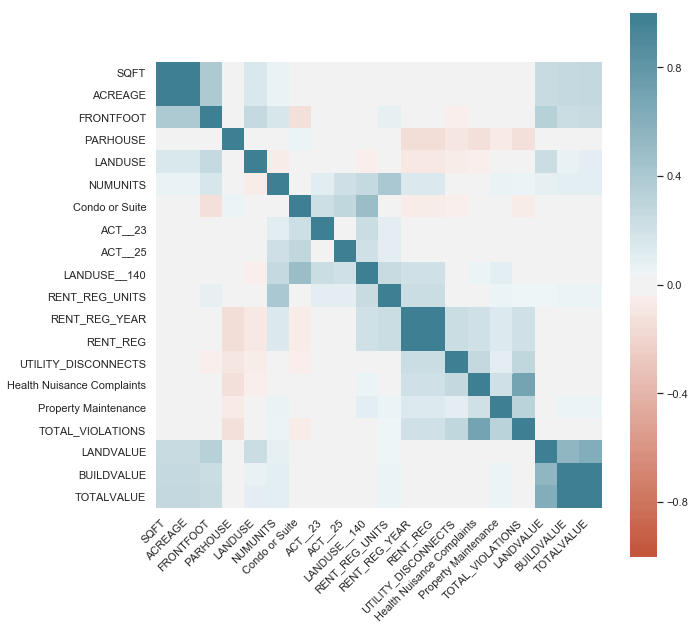

In [50]:
corr = X_new.corr()


plt.figure(figsize = (10,10))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [51]:
logreg = LogisticRegression()
logreg.fit(X, y)
Y_pred = logreg.predict(X)
acc_log = round(logreg.score(X, y) * 100, 2)
acc_log_sum = Y_pred.sum()
acc_log

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


98.19

In [30]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc_sum = Y_pred.sum()
acc_svc

NameError: name 'X_train' is not defined

In [18]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)
Y_pred = knn.predict(X)
acc_knn = round(knn.score(X, y) * 100, 2)
acc_knn_sum = Y_pred.sum()
acc_knn

98.36

In [19]:
gaussian = GaussianNB()
gaussian.fit(X, y)
Y_pred = gaussian.predict(X)
acc_gaussian = round(gaussian.score(X, y) * 100, 2)
acc_gaussian_sum = Y_pred.sum()
acc_gaussian

96.9

In [20]:
perceptron = Perceptron()
perceptron.fit(X, y)
Y_pred = perceptron.predict(X)
acc_perceptron = round(perceptron.score(X, y) * 100, 2)
acc_perceptron_sum = Y_pred.sum()
acc_perceptron

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


97.89

In [21]:
linear_svc = LinearSVC()
linear_svc.fit(X, y)
Y_pred = linear_svc.predict(X)
acc_linear_svc = round(linear_svc.score(X, y) * 100, 2)
acc_linear_svc_sum = Y_pred.sum()
acc_linear_svc

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


97.89

In [22]:
sgd = SGDClassifier()
sgd.fit(X, y)
Y_pred = sgd.predict(X)
acc_sgd = round(sgd.score(X, y) * 100, 2)
acc_sgd_sum = Y_pred.sum()
acc_sgd

C:\Users\T1302\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


98.02

In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
Y_pred = decision_tree.predict(X)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree_sum = Y_pred.sum()
acc_decision_tree

99.79

In [32]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth = 50)
random_forest.fit(X, y)
Y_pred = random_forest.predict(X)
random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)
acc_random_forest_sum = Y_pred.sum()
Y_pred.sum()

1042.0

In [26]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Predict no fires'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, (1 - 1035/59865)*100],
    'Sum': [acc_knn_sum, acc_log_sum, 
              acc_random_forest_sum, acc_gaussian_sum, acc_perceptron_sum, 
              acc_sgd_sum, acc_linear_svc_sum, acc_decision_tree_sum, 0],
    })
models.sort_values(by='Score', ascending=False)

,Model,Score,Sum
2,Random Forest,100.00000,1165.0
7,Decision Tree,100.00000,1165.0
0,KNN,98.36000,292.0
8,Predict no fires,98.27111,0.0
1,Logistic Regression,98.03000,21.0
5,Stochastic Gradient Decent,98.02000,8.0
4,Perceptron,97.89000,131.0
6,Linear SVC,97.89000,101.0
3,Naive Bayes,96.90000,925.0


# Optimize the model

In [39]:
#### Pipeline stuff
# https://campus.datacamp.com/courses/designing-machine-learning-workflows-in-python/model-lifecycle-management?ex=1
# Create pipeline with feature selector and classifier
pipe = Pipeline([
    ('feature_selection', SelectKBest(f_classif)),
    ('clf', RandomForestClassifier(random_state=2))])

# Create a parameter grid
params = {
   'feature_selection__k':[10, 20],
    'clf__n_estimators':[2, 5],
    'clf__max_depth' : [3, 5, 10]}

# Initialize the grid search object
grid_search = GridSearchCV(pipe, param_grid=params)

# Fit it to the data and print the best value combination
print(grid_search.fit(X_new, y).best_params_)

NameError: name 'Pipeline' is not defined

# Cross validation and 2018 predictions

In [41]:
# Cross-validation score for Random Forest
Score = cross_val_score(random_forest, X, y, cv=3)

round(np.mean(Score)*100, ndigits=4)

98.1531

Best Decision Tree score = 0.9939

Best RF score = 99.8735

In [34]:
#df['PREDICTION_dt'] = decision_tree.predict_proba(X)
probability = decision_tree.predict_proba(X)[:,1]
df['PREDICTION_1'] = probability
probability.sum()
probability2 = random_forest.predict_proba(X)[:,1]
probability2.sum()
df['PREDICTION_2'] = probability2

In [37]:
rf_proba_results = df[df['PREDICTION_2'] > 0]
rf_proba_results

,SQFT,ACREAGE,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,E,N,S,...,Zoning,TOTAL_VIOLATIONS,ANY_VIOLATIONS,LANDVALUE,BUILDVALUE,TOTALVALUE,INCIDENT,INCIDENT_2018,PREDICTION_1,PREDICTION_2
ADDRESS,,,,,,,,,,,,,,,,,,,,,
3910 E WILCOX ST,154001.0,3.54,385.0,3910.0,540,0,57104,1,0,0,...,0.0,0.0,0.0,269502.0,1183885.0,1453387.0,0.0,0,0.000000,0.010000
6600 E RICE ST,400000.0,9.18,0.0,6600.0,460,0,57110,1,0,0,...,0.0,0.0,0.0,91800.0,0.0,91800.0,0.0,0,0.000000,0.010000
4800 N VELOCITY AVE,106049.0,2.43,275.0,4800.0,250,0,57104,0,1,0,...,0.0,0.0,0.0,185586.0,885096.0,1070682.0,0.0,0,0.000000,0.010000
3500 E BENSON RD,1546380.0,35.50,0.0,3500.0,970,0,57104,1,0,0,...,0.0,0.0,0.0,124250.0,0.0,124250.0,0.0,0,0.000000,0.040000
4301 E 60TH ST N,2092233.0,48.03,331.0,4301.0,970,0,57104,1,0,0,...,0.0,0.0,0.0,356270.0,0.0,356270.0,0.0,0,0.000000,0.020000
4000 E BENSON RD,826768.0,18.98,651.0,4000.0,460,0,57104,1,0,0,...,0.0,0.0,0.0,289445.0,0.0,289445.0,0.0,0,0.000000,0.020000
2900 E BENSON RD,1640307.0,37.66,809.0,2900.0,970,0,57104,1,0,0,...,0.0,0.0,0.0,356715.0,0.0,356715.0,0.0,0,0.000000,0.010000
601 E 50TH ST N,579488.0,13.30,557.0,601.0,220,0,57104,1,0,0,...,0.0,0.0,0.0,1014104.0,5263671.0,6277775.0,0.0,1,0.000000,0.050000
5101 N NATIONAL AVE,70558.0,1.62,422.0,5101.0,970,0,57104,0,1,0,...,0.0,0.0,0.0,123477.0,0.0,123477.0,0.0,0,0.000000,0.010000


In [39]:
rf_proba_results.INCIDENT_2018.sum()

53

In [41]:
print('Total predicted fires : ' + str(rf_proba_results.shape[0]))
print('Total correctly predicted fires : ' + str(rf_proba_results.INCIDENT.sum()))
print('Total 2018 predicted fires : ' + str(rf_proba_results.INCIDENT_2018.sum()))

Total predicted fires : 11862
Total correctly predicted fires : 1069.0
Total 2018 predicted fires : 53


In [55]:
rf_results_search = df.nlargest(2053, columns = 'PREDICTION_2')
print('Total searched houses: ' + str(rf_results_search.shape[0]))
print('Total correctly predicted fires : ' + str(rf_results_search.INCIDENT.sum()))
print('Total 2018 predicted fires : ' + str(rf_results_search.INCIDENT_2018.sum()))

Total searched houses: 2053
Total correctly predicted fires : 1053.0
Total 2018 predicted fires : 12


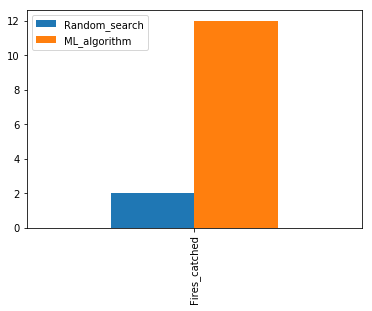

In [56]:
# If we did 1000 in a year:
np.random.seed(0)
df['RANDOM'] = np.random.rand(df.shape[0])
df_random = df.nlargest(1000, columns = 'RANDOM')

random_results = df_random.INCIDENT_2018.sum()

rf_results = rf_results_search.INCIDENT_2018.sum()

df_results = pd.DataFrame({'Random_search' : [random_results], 'ML_algorithm' : [rf_results]}, index=['Fires_catched'])
df_results.plot.bar()

SQFT         16516
ACREAGE       0.38
FRONTFOOT       38
PARHOUSE         0
LANDUSE        970
NUMUNITS         0
ZIPCODE      57110
E                0
N                0
S                0
Name: 4400 S SYCAMORE AVE, dtype: object

# Fit and describe the chosen model

In [28]:
# Feature importance
# https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',                                                                 
                                                                        ascending=False)
feature_importances

,importance
SQFT,0.428297
TOTALVALUE,0.399889
NUMUNITS,0.079283
TOTAL_VIOLATIONS,0.035284
UTILITY_DISCONNECTS,0.035215
Property Maintenance,0.012163
RENT_REG,0.009870


In [45]:
df['PREDICTION'] = random_forest.predict(X_new)

In [46]:
df[df['ADDRESS'] == '1400 E 8TH ST']

KeyError: 'ADDRESS'

In [47]:
df[df['PREDICTION'] == 1].describe()

,SQFT,ACREAGE,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,E,N,S,...,Vegetation,Waste Water,Water Purfication,Zoning,TOTAL_VIOLATIONS,ANY_VIOLATIONS,LANDVALUE,BUILDVALUE,TOTALVALUE,PREDICTION
count,1.062000e+03,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,...,1062.000000,1062.000000,1062.0,1062.000000,1062.000000,1062.000000,1.062000e+03,1.062000e+03,1.062000e+03,1062.0
mean,9.945541e+04,2.283239,144.061205,2340.376648,244.626177,7.617702,57105.017891,0.142185,0.170433,0.441620,...,0.235405,0.000942,0.0,0.112053,0.804143,0.362524,1.485299e+05,1.005167e+06,1.153543e+06,1.0
std,3.894552e+05,8.940897,253.670987,1886.729262,256.121243,22.961526,3.277700,0.349404,0.376190,0.496814,...,0.784600,0.030686,0.0,0.413789,1.575993,0.480955,6.356094e+05,7.682437e+06,8.204415e+06,0.0
min,1.697000e+03,0.040000,0.000000,19.000000,110.000000,0.000000,57103.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,6.160750e+03,0.140000,44.000000,800.000000,110.000000,1.000000,57104.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,6.733500e+03,0.000000e+00,1.074850e+04,1.0
50%,9.530000e+03,0.220000,72.000000,1907.500000,140.000000,1.000000,57105.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.344150e+04,1.043275e+05,1.323705e+05,1.0
75%,3.047850e+04,0.700000,133.000000,3600.000000,140.000000,1.000000,57106.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,4.617875e+04,2.033425e+05,2.604692e+05,1.0
max,5.093906e+06,116.940000,4552.000000,9405.000000,970.000000,282.000000,57197.000000,1.000000,1.000000,1.000000,...,9.000000,1.000000,0.0,4.000000,12.000000,1.000000,9.028652e+06,1.324379e+08,1.414665e+08,1.0


In [48]:
df[df['PREDICTION'] == 0].describe()

,SQFT,ACREAGE,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,E,N,S,...,Vegetation,Waste Water,Water Purfication,Zoning,TOTAL_VIOLATIONS,ANY_VIOLATIONS,LANDVALUE,BUILDVALUE,TOTALVALUE,PREDICTION
count,5.813000e+04,58130.000000,58130.000000,58130.000000,58130.000000,58130.000000,58130.000000,58130.000000,58130.000000,58130.000000,...,58130.000000,58130.000000,58130.000000,58130.000000,58130.000000,58130.000000,5.813000e+04,5.813000e+04,5.813000e+04,58130.0
mean,2.640899e+04,0.606702,81.949830,3186.677688,187.982522,1.181438,57105.763169,0.183795,0.123912,0.457113,...,0.114829,0.000275,0.000034,0.055341,0.341665,0.181782,4.020561e+04,1.565719e+05,1.968317e+05,0.0
std,2.787752e+05,6.399564,101.579684,2329.396451,220.748678,4.928949,2.306133,0.387320,0.329484,0.498162,...,0.514018,0.016588,0.005866,0.287986,1.019779,0.385668,1.400758e+05,9.439983e+05,1.008398e+06,0.0
min,0.000000e+00,0.000000,0.000000,0.000000,110.000000,0.000000,57103.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,6.664250e+03,0.150000,50.000000,1200.000000,110.000000,1.000000,57104.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.920000e+03,0.000000e+00,1.995000e+04,0.0
50%,8.850000e+03,0.200000,70.000000,2708.000000,110.000000,1.000000,57106.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.484250e+04,1.017055e+05,1.275865e+05,0.0
75%,1.223875e+04,0.280000,90.000000,4908.000000,120.000000,1.000000,57108.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.510800e+04,1.471312e+05,1.820695e+05,0.0
max,5.205275e+07,1194.970000,6127.000000,47184.000000,999.000000,353.000000,57197.000000,1.000000,1.000000,1.000000,...,13.000000,1.000000,1.000000,9.000000,19.000000,1.000000,7.332668e+06,9.999022e+07,1.004169e+08,0.0


In [49]:
df[df['PREDICTION'] == 1].head(20)

,SQFT,ACREAGE,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,E,N,S,...,Vegetation,Waste Water,Water Purfication,Zoning,TOTAL_VIOLATIONS,ANY_VIOLATIONS,LANDVALUE,BUILDVALUE,TOTALVALUE,PREDICTION
ADDRESS,,,,,,,,,,,,,,,,,,,,,
4900 N CLIFF AVE,93380.0,2.14,326.0,4900.0,850,0,57104,0,1,0,...,1.0,0.0,0.0,0.0,1.0,1.0,256795.0,816132.0,1072927.0,1.0
400 E 60TH ST N,119790.0,2.75,200.0,400.0,570,0,57104,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,209633.0,796357.0,1005990.0,1.0
4720 N 4TH AVE,145490.0,3.34,265.0,4720.0,240,0,57104,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,254608.0,1174052.0,1428660.0,1.0
5001 N CLIFF AVE,146405.0,3.36,400.0,5001.0,850,0,57104,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,472500.0,1361707.0,1834207.0,1.0
4501 N SEUBERT AVE,11152.0,0.26,82.0,4501.0,970,0,57104,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,19516.0,0.0,19516.0,1.0
5410 N GRANITE LN,101030.0,2.32,307.0,5410.0,850,0,57107,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,303047.0,3708025.0,4011072.0,1.0
4301 W KOGEL DR,13982.0,0.32,74.0,4301.0,110,1,57107,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,31111.0,117259.0,148370.0,1.0
4317 N COLORADO AVE,8513.0,0.20,67.0,4317.0,110,1,57107,0,1,0,...,1.0,0.0,0.0,0.0,1.0,1.0,25390.0,102719.0,128109.0,1.0
4324 W PANDA DR,9506.0,0.22,70.0,4324.0,110,1,57107,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,26450.0,98979.0,125429.0,1.0


In [50]:
df.describe()

,SQFT,ACREAGE,FRONTFOOT,PARHOUSE,LANDUSE,NUMUNITS,ZIPCODE,E,N,S,...,Vegetation,Waste Water,Water Purfication,Zoning,TOTAL_VIOLATIONS,ANY_VIOLATIONS,LANDVALUE,BUILDVALUE,TOTALVALUE,PREDICTION
count,5.919200e+04,59192.000000,59192.000000,59192.000000,59192.000000,59192.000000,59192.000000,59192.000000,59192.000000,59192.000000,...,59192.000000,59192.000000,59192.000000,59192.000000,59192.000000,59192.000000,5.919200e+04,5.919200e+04,5.919200e+04,59192.000000
mean,2.771956e+04,0.636781,83.064208,3171.493682,188.998801,1.296915,57105.749797,0.183048,0.124747,0.456835,...,0.116992,0.000287,0.000034,0.056359,0.349963,0.185025,4.214912e+04,1.717971e+05,2.139966e+05,0.017942
std,2.813077e+05,6.457713,106.558582,2324.900398,221.558233,5.834313,2.329204,0.386709,0.330434,0.498138,...,0.520350,0.016945,0.005813,0.290815,1.034205,0.388321,1.634553e+05,1.394907e+06,1.490412e+06,0.132740
min,0.000000e+00,0.000000,0.000000,0.000000,110.000000,0.000000,57103.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,6.650000e+03,0.150000,50.000000,1126.750000,110.000000,1.000000,57104.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.897750e+03,0.000000e+00,1.979350e+04,0.000000
50%,8.855000e+03,0.200000,70.000000,2704.000000,110.000000,1.000000,57106.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.483400e+04,1.017635e+05,1.276355e+05,0.000000
75%,1.230350e+04,0.280000,90.000000,4904.000000,120.000000,1.000000,57108.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.518400e+04,1.476138e+05,1.825922e+05,0.000000
max,5.205275e+07,1194.970000,6127.000000,47184.000000,999.000000,353.000000,57197.000000,1.000000,1.000000,1.000000,...,13.000000,1.000000,1.000000,9.000000,19.000000,1.000000,9.028652e+06,1.324379e+08,1.414665e+08,1.000000
